In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
symbol = 'BTC-USD'
df = yf.download(
  [symbol],
  start = "2016-01-31",
  end = "2020-01-31",
  interval="1d"
)

df['9-day MA'] = df['Close'].rolling(73).mean()
df['21-day MA'] = df['Close'].rolling(76).mean()

df['signal'] = np.where(df['9-day MA'] > df['21-day MA'], 1, 0)                     # signal de long si 9j MA > 21j MA
df['signal'] = np.where(df['9-day MA'] < df['21-day MA'], -1, df['signal'])          # signal de short si 9j MA < 21j MA
                                                                                    # on enleve les 21 jours inutilisables

df['return'] = np.log(df['Close']).diff().shift(-1)                                             #calcule revenues~~ via formule de differences des log
df['system_return'] = df['signal'] * df['return']                                   #calcule revenues si short ou long

df.dropna(inplace=True)

df['entry'] = df.signal.diff()                                                          #si on a un changement de long a short 

df.head()
##df_BTC.to_csv("BTC_1d_2016-2020_testMAstrat.csv")
##print(f"Got {len(df_BTC)} rows at 1day intervals")

/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_9384/1509347737.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,9-day MA,21-day MA,signal,return,system_return,entry
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,
Date,,,,,,,,,,,
2016-04-15,429.713013,429.928009,424.427002,424.427002,54801500,414.119588,412.460538,1,0.001997,0.001997,NaN
2016-04-16,430.571991,432.625000,428.984009,429.575012,39392800,414.950040,413.273762,1,-0.007397,-0.007397,0.0
2016-04-17,427.398987,431.371002,426.079010,430.635986,52125900,415.467916,413.988801,1,0.002785,0.002785,0.0
2016-04-18,428.591003,429.273987,427.085999,427.610992,55670900,416.043834,414.701209,1,0.016012,0.016012,0.0
2016-04-19,435.509003,436.019989,428.104004,428.703003,52810500,416.851875,415.563841,1,0.013411,0.013411,0.0


In [3]:
matplotlib.rcParams['figure.figsize'] = 15, 15

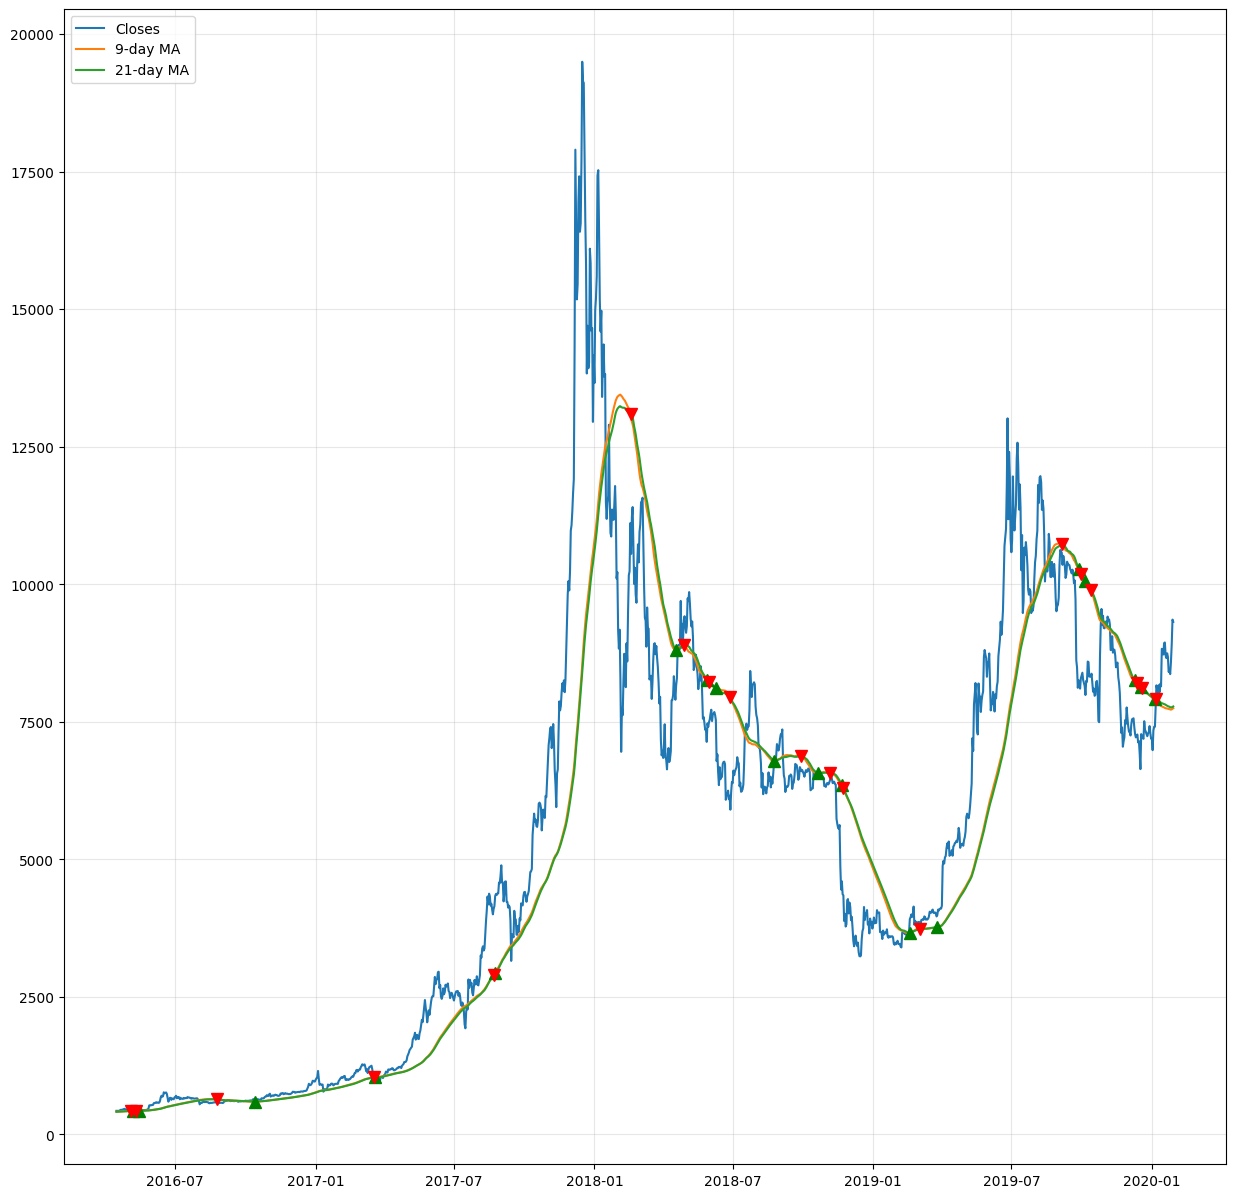

In [4]:

plt.grid(True, alpha = .3)

plt.plot(df['Close'],label = 'Closes')
plt.plot(df['9-day MA'], label = '9-day MA')
plt.plot(df['21-day MA'], label = '21-day MA')

plt.plot(df.loc[df.entry == 2].index, df['9-day MA'][df.entry == (2)], '^', color = 'g', markersize = 9)
plt.plot(df.loc[df.entry == -2].index, df['21-day MA'][df.entry == -2], 'v', color = 'r', markersize = 9)

plt.legend(loc=2)

/Users/matteogiori/trycloneinsider/TradingBot/.venv313/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/matteogiori/trycloneinsider/TradingBot/.venv313/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


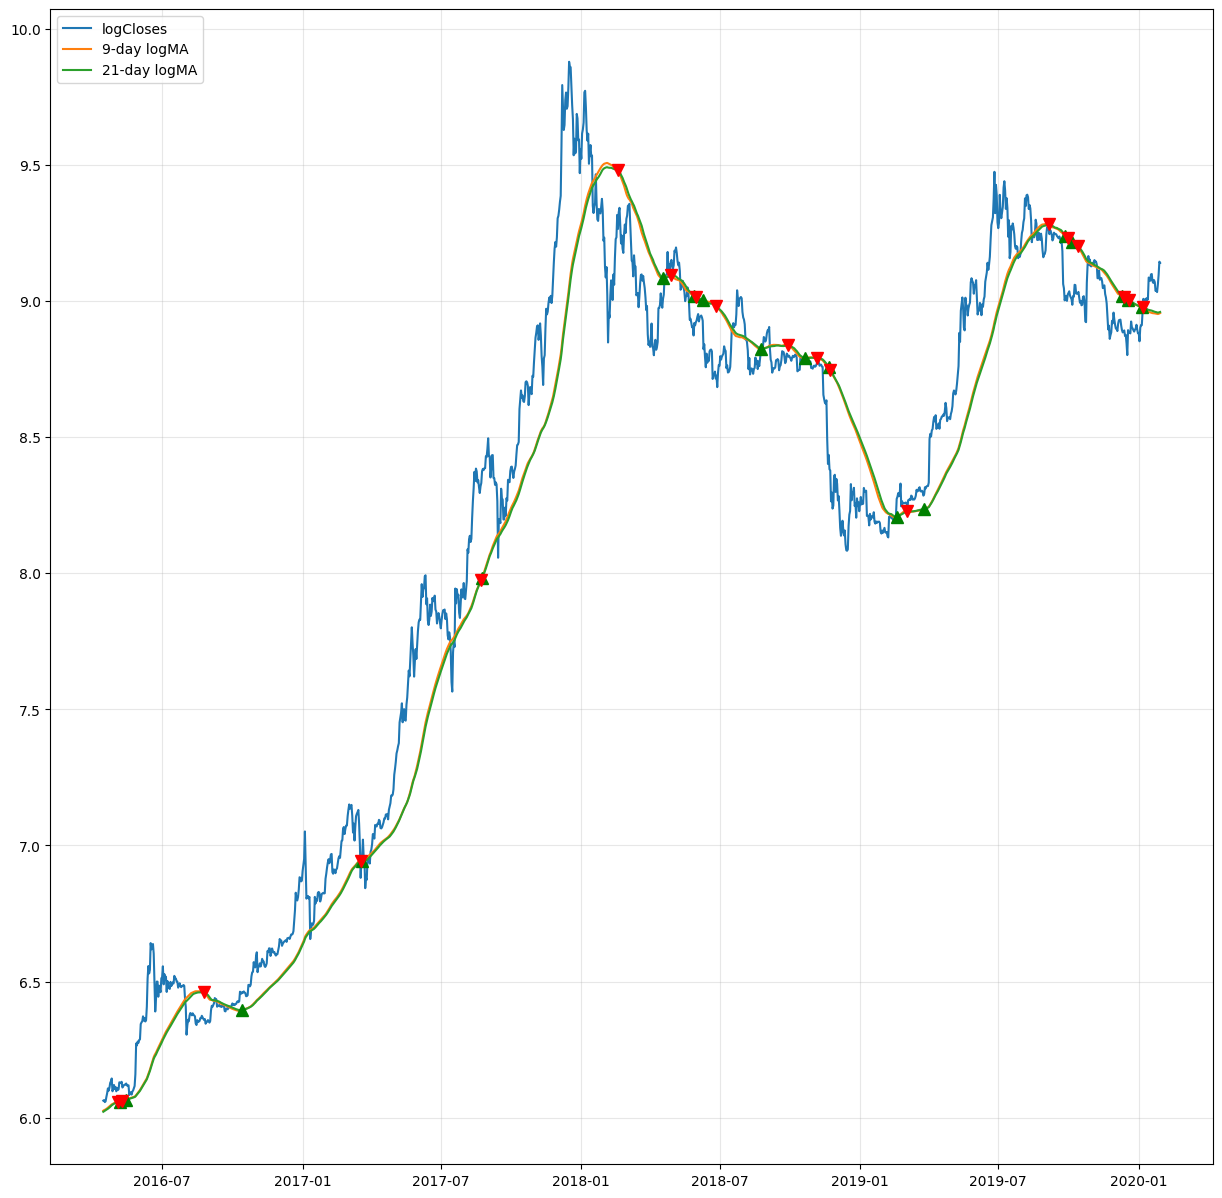

In [5]:
logBTC = np.log(df)

plt.grid(True, alpha = .3)
plt.plot(logBTC['Close'], label = 'logCloses')
plt.plot(logBTC['9-day MA'], label = '9-day logMA')
plt.plot(logBTC['21-day MA'], label = '21-day logMA')

plt.plot(logBTC.loc[df.entry == 2].index, logBTC['9-day MA'][df.entry == (2)], '^', color = 'g', markersize = 9)
plt.plot(logBTC.loc[df.entry == -2].index, logBTC['21-day MA'][df.entry == -2], 'v', color = 'r', markersize = 9)
plt.legend(loc=2)

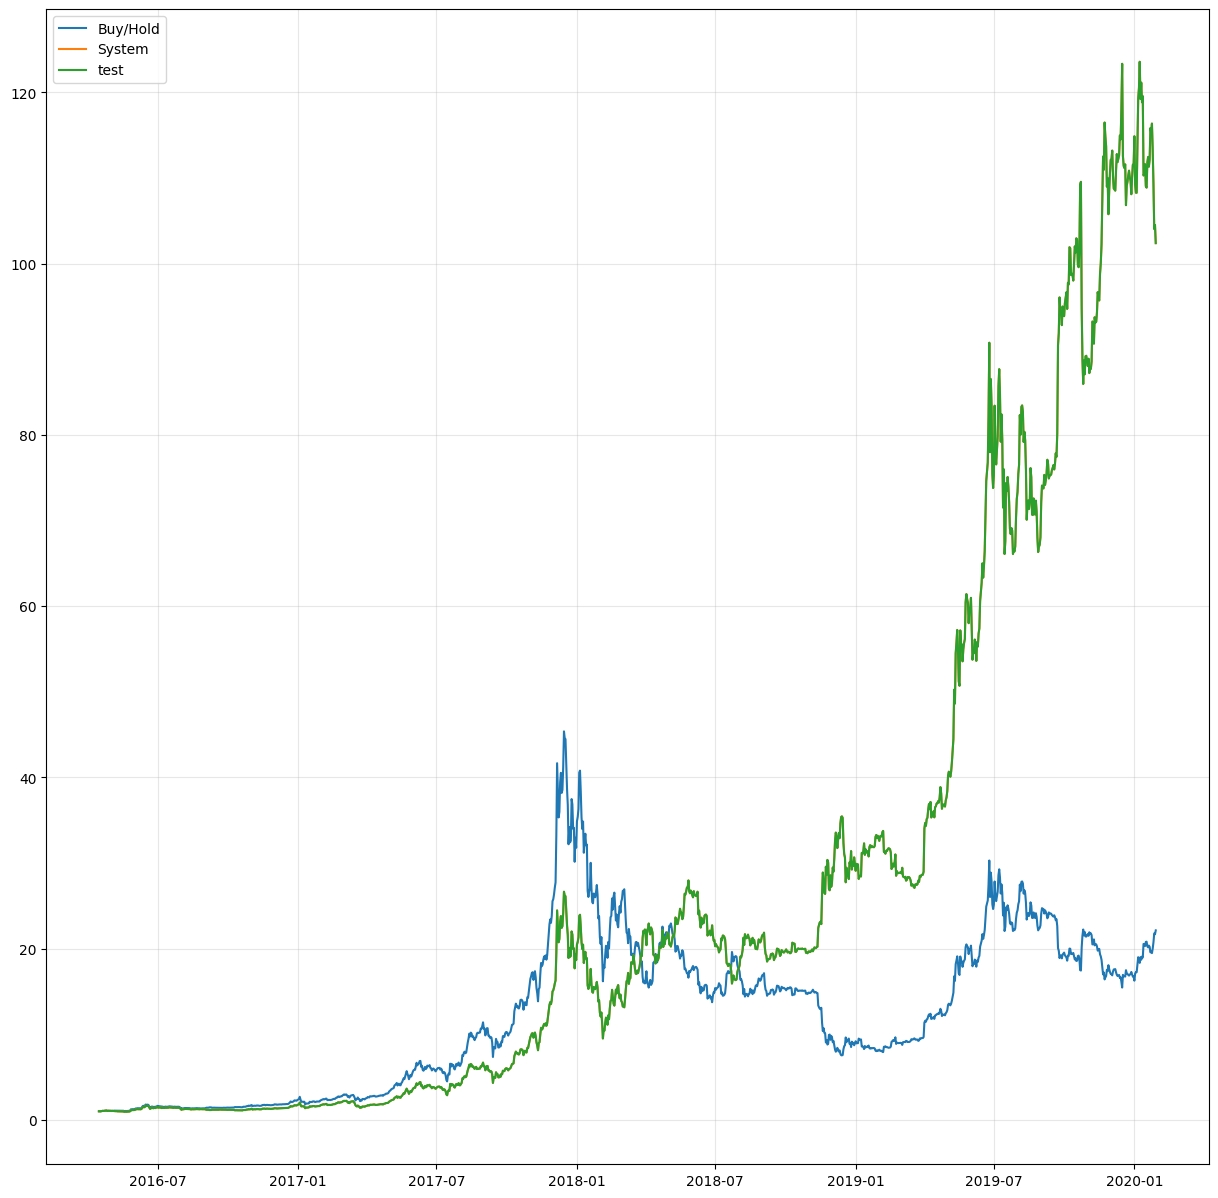

In [6]:
plt.plot(np.exp(df['return']).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(df['system_return']).cumprod(), label = 'System')
plt.plot(np.exp(df['system_return'].cumsum()), label='test')
plt.legend(loc=2)
plt.grid(True, alpha = .3)

In [7]:
print(np.exp(df['return']).cumprod()[-1]-1)

21.1287065625934


/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_9384/578442778.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df['return']).cumprod()[-1]-1)


In [8]:
print(np.exp(df['system_return']).cumprod()[-1] - 1)

101.40095267811633


/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_9384/2800198341.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df['system_return']).cumprod()[-1] - 1)


In [9]:
print(np.exp(df['system_return'].cumsum())[-1])

102.400952678116


/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_9384/2557051525.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df['system_return'].cumsum())[-1])


In [10]:
symbol_2 = 'ETH-USD'
ETH = yf.download(
  symbol_2,
  start = "2016-01-31",
  end = "2020-01-31",
  interval="1d"
)



ETH = ETH[
    (ETH.index.year >= 2018)
  & (ETH.index.year < 2020)
]

print(ETH)


/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_9384/3566925228.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ETH = yf.download(
[*********************100%***********************]  1 of 1 completed

Price            Close         High         Low        Open      Volume
Ticker         ETH-USD      ETH-USD     ETH-USD     ETH-USD     ETH-USD
Date                                                                   
2018-01-01  772.640991   782.530029  742.004028  755.757019  2595760128
2018-01-02  884.443970   914.830017  772.346008  772.346008  5783349760
2018-01-03  962.719971   974.471008  868.450989  886.000000  5093159936
2018-01-04  980.921997  1045.079956  946.085999  961.713013  6502859776
2018-01-05  997.719971  1075.390015  956.325012  975.750000  6683149824
...                ...          ...         ...         ...         ...
2019-12-27  127.214607   128.097565  124.820808  126.368797  8299390176
2019-12-28  128.322708   130.258163  126.899696  127.213013  8069298610
2019-12-29  134.757980   136.811203  127.997658  128.266876  9708776786
2019-12-30  132.633484   136.757355  131.545563  134.796524  9796951716
2019-12-31  129.610855   133.732681  128.798157  132.612274  893